<h1 style="text-align:center;">Лабораторная работа №3</h2>

<h2 style="text-align:center;">Решение дифференциального уравнения с периодическим краевым условием модифицированным методом прогонки</h2>

<h3 style="text-align:center;">Тулупов Николай Дмитриевич</h3>
<h3 style="text-align:center;">Б01-204</h3>

### Цель - решение задачи с периодическими граничными условиями
<img src="images\task1.png" alt="drawing" width="750"/>
<img src="images\task2.png" alt="drawing" width="750"/>



Рассматривается задача численного решения дифференциального уравнения:  $$y''(x) - P^2(x) y(x) = f(x), \quad x \in [0, 1],$$
с периодическими граничными условиями: $$y(0) = y(1),$$ где функции $ P^2(x) $ и $ f(x) $ — периодические с периодом 1.  
Сетка разбивается шагом $ h $, всего $ N = \frac{1}{h} $ узлов.

---

##### Разностная аппроксимация

Используется центральная разностная схема второго порядка:

$$
\frac{y_{n+1} - 2y_n + y_{n-1}}{h^2} - P^2(x_n) y_n = f(x_n),
$$

что можно привести к виду:

$$
a_n y_{n-1} - b_n y_n + c_n y_{n+1} = \varphi_n,
$$

где:
- $ a_n = \frac{1}{h^2} $,
- $ c_n = \frac{1}{h^2} $,
- $ b_n = \frac{2}{h^2} + P^2(x_n) $,
- $ \varphi_n = f(x_n) $.

---

##### Структура системы

Если бы граничные условия были обычными (например, Дирихле), система была бы **строго трёхдиагональной**. Однако при периодичности крайние значения связаны:

$$
y_0 = y_N,
$$

а значит, система становится **почти трёхдиагональной**: в первом и последнем уравнении появляется связь между краями сетки. Получается **циклически замкнутая система**, для которой стандартный метод прогонки **не подходит**.

---

##### Обычная прогонка

Стандартная трёхдиагональная прогонка решает систему вида:
$$a_n y_{n-1} - b_n y_n + c_n y_{n+1} = \varphi_n,$$
путём рекуррентного вычисления коэффициентов:
$$\alpha_{n+1} = \frac{c_n}{b_n - a_n \alpha_n}, \quad
\beta_{n+1} = \frac{\varphi_n + a_n \beta_n}{b_n - a_n \alpha_n},$$
а затем обратным ходом:
$$y_n = \alpha_n y_{n+1} + \beta_n.$$
Но она предполагает известные значения на границах, чего нет в периодическом случае.

---

##### Циклическая (периодическая) прогонка

Чтобы решить **почти трёхдиагональную** систему, используется модифицированный метод прогонки:
1. Выполняется **прямой ход прогонки**, как обычно, до последнего уравнения.
2. Последнее уравнение содержит как \( y_0 \), так и \( y_{N-1} \). Используется выражение:
   $$   y_{N-1} = \alpha_N y_0 + \beta_N   $$
   Подставляется в последнее уравнение, получаем:
   $$   y_0 = \frac{\nu}{1 - \mu},   $$
   где:
   $$
   \mu = \frac{a_{N-1} \alpha_N + c_{N-1}}{b_{N-1} - a_{N-1} \alpha_N}, \quad
   \nu = \frac{\varphi_{N-1} + a_{N-1} \beta_N}{b_{N-1} - a_{N-1} \alpha_N}
   $$

3. После нахождения \( y_0 \), остальные значения находятся из формулы:
   $$   y_n = \alpha_n y_0 + \beta_n$$

---

##### Вывод
Периодические условия приводят к системе, в которой матрица **замкнута по кругу**, и её решение требует учёта взаимосвязи крайних узлов - модифицированный метод прогонки позволяет корректно решить такую задачу.

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

In [154]:
# Параметры задачи
h = 0.005
N = int(1 / h)
x_start = 0
x_finish = 1

In [155]:
x = np.linspace(x_start, x_finish - h, N)

# Заданные функции
P2 = 10 + np.sin(2 * pi * x)
f = np.cos(2 * pi * x)

# Коэффициенты разностной схемы
a = np.ones(N) / h**2
c = np.ones(N) / h**2
b = 2 / h**2 + P2
phi = f

# Модифицированный метод прогонки (циклический)
alpha = np.zeros(N)
beta =  np.zeros(N)

# Прямая прогонка
alpha[1] = c[0] / b[0]
beta[1] =  phi[0] / b[0]

for i in range(1, N - 1):
    denom = b[i] - a[i] * alpha[i]
    alpha[i + 1] = c[i] / denom
    beta[i + 1] = (phi[i] + a[i] * beta[i]) / denom



# 1 метод
# Вычисление коэффициентов для уравнения на y0
mu = (a[-1] * alpha[-1] + c[-1])  / (b[-1] - a[-1] * alpha[-1])
nu = (phi[-1] + a[-1] * beta[-1]) / (b[-1] - a[-1] * alpha[-1])
# Решение для y0
y_1 = np.zeros(N)
y_1[0] = nu / (1 - mu)
# Обратная прогонка
for i in range(1, N):
    y_1[i] = alpha[i] * y_1[0] + beta[i]



# 2 метод
mu = a[-1] * alpha[-2] + b[-1] * alpha[-1] + c[-1]
nu = a[-1] * beta[-2] + b[-1] * beta[-1] - phi[-1]
y_2 = np.zeros(N)
y_2[0] = -nu / mu
for i in range(1, N):
    y_2[i] = alpha[i] * y_2[0] + beta[i]



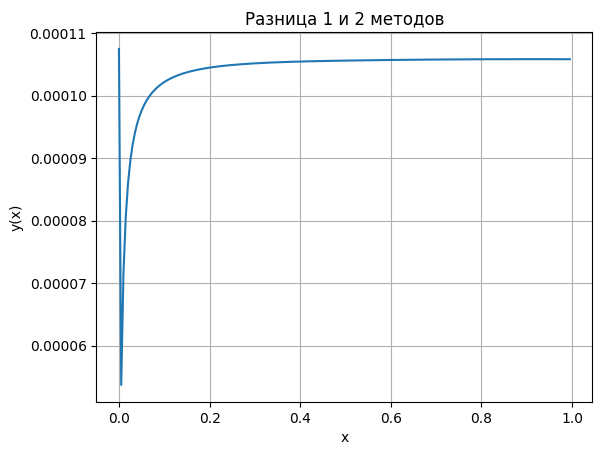

In [156]:
# Построение графика
plt.plot(x, y_2-y_1)
plt.title("Разница 1 и 2 методов")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.show()

**Почему исходный (1й) способ даёт почти тот же результат, что и верный (2й), несмотря на метологическую ошибку**

В начальной реализации формула для замыкающего уравнения имела вид:

$$
\mu = \frac{a_{N-1} \alpha_{N-1} + c_{N-1}}{b_{N-1} - a_{N-1} \alpha_{N-1}}, \quad
\nu = \frac{\varphi_{N-1} + a_{N-1} \beta_{N-1}}{b_{N-1} - a_{N-1} \alpha_{N-1}}, \quad
y_0 = \frac{\nu}{1 - \mu}
$$

Однако эта формула неполно учитывает структуру последнего уравнения, так как в нём фигурирует также переменная $ y_{N-2} $, которая была пропущена.

Корректный аналитический вывод должен учитывать:

$$
y_{N-2} = \alpha_{N-2} y_0 + \beta_{N-2}
$$

что даёт более точную форму:

$$
\mu = a_{N-1} \alpha_{N-2} + b_{N-1} \alpha_{N-1} + c_{N-1}, \quad
\nu = a_{N-1} \beta_{N-2} + b_{N-1} \beta_{N-1} - \varphi_{N-1}, \quad
y_0 = -\frac{\nu}{\mu}
$$

**Почему численно результат совпадает?**

Несмотря на различие в формулах, численно оба подхода дают практически одинаковые значения. Это связано с тем, что:
- значения $ \alpha_{N-2} \approx \alpha_{N-1} $, $ \beta_{N-2} \approx \beta_{N-1} $ на последних шагах почти равны,
- шаг $ h $ достаточно мал, и разница между соседними коэффициентами — порядка $ h $,
- решение гладкое (синусоидальные $ P^2(x) $ и $ f(x) $), и не вызывает резкой чувствительности к ошибке.

Таким образом, ошибка носит методический характер, но в конкретной задаче не оказывает заметного влияния на численный результат. Однако при других граничных условиях, разрывных коэффициентах или грубой сетке эта разница может стать существенной.


In [157]:
def periodic_thomas_algorithm(x_start, x_finish, h):

    N = int(1 / h)
    x = np.linspace(x_start, x_finish - h, N)

    # Заданные функции
    P2 = 10 + np.sin(2 * pi * x)
    f = np.cos(2 * pi * x)

    # Коэффициенты разностной схемы
    a = np.ones(N) / h**2
    c = np.ones(N) / h**2
    b = 2 / h**2 + P2
    phi = f

    # Модифицированный метод прогонки (циклический)
    alpha = np.zeros(N)
    beta =  np.zeros(N)

    # Прямая прогонка
    alpha[1] = c[0] / b[0]
    beta[1] =  phi[0] / b[0]

    for i in range(1, N - 1):
        denom = b[i] - a[i] * alpha[i]
        alpha[i + 1] = c[i] / denom
        beta[i + 1] = (phi[i] + a[i] * beta[i]) / denom

    
    mu = a[-1] * alpha[-2] + b[-1] * alpha[-1] + c[-1]
    nu = a[-1] * beta[-2] + b[-1] * beta[-1] - phi[-1]
    y_2 = np.zeros(N)
    y_2[0] = -nu / mu
    for i in range(1, N):
        y_2[i] = alpha[i] * y_2[0] + beta[i]

    return x, y_2

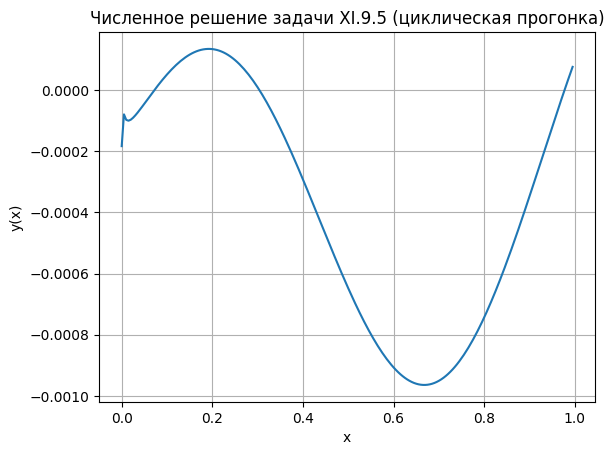

In [158]:
# Построение графика
x, y = periodic_thomas_algorithm(0, 1, 0.005)
plt.plot(x, y)
plt.title("Численное решение задачи XI.9.5 (циклическая прогонка)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.show()

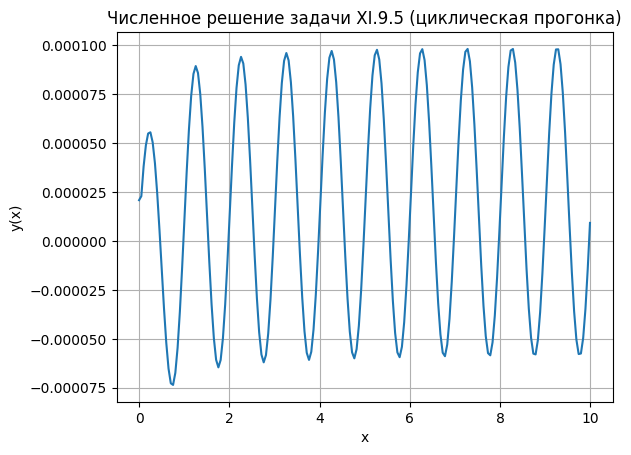

In [159]:
# Построение графика
x, y = periodic_thomas_algorithm(0, 10, 0.005)
plt.plot(x, y)
plt.title("Численное решение задачи XI.9.5 (циклическая прогонка)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.show()

**Почему первый период на интервале [0, 10] немного отличается**

При решении задачи на интервале [0, 10] с использованием метода циклической прогонки, визуально заметно, что первый период на [0, 1] немного "опущен" по сравнению с остальными. Это не ошибка численного метода, а естественное следствие способа замыкания системы:

- Метод циклической прогонки решает систему с одним условием периодичности:
  $$
  y_0 = y_{N},
  $$
  что означает замыкание только начала и конца интервала $[0, 10]$.

- Однако, сама задача по смыслу предполагает периодичность с шагом 1, т.е. $y(x + 1) = y(x)$ для любого $x$.  
  Но такая периодичность не задаётся явно внутри системы: нет условий вида $y_1 = y_{1+N}$, $y_2 = y_{2+N}$ и т.д.

- В результате система корректно отрабатывает глобальное замыкание между $x = 0$ и $x = 10$, но:
  - первый период связан с концом (где период уже "устоялся"),
  - все остальные периоды оказываются "внутри" сетки и формируются естественно и симметрично.

**Итог:**
Первый кусок решения — это краевой слой, где численное влияние граничных условий слегка искажает поведение функции. Это ожидаемый и допустимый эффект при замкнутом решении на большом отрезке. Для получения идеально периодичного решения на длинном интервале рекомендуется:

- либо решать задачу на интервале [0, 1] и повторять период вручную,
- либо использовать только "внутренние" периоды при анализе, избегая влияния края.

Таким образом, небольшой сдвиг в первом периоде на отрезке [0, 10] — **не является ошибкой**, а отражает специфику наложения одного единственного периодического условия в методе.
